In [10]:
#MNIST
#Dataloader, Transformation
#Multilayer neural net, activation function
#Loss and optimizer
#Training Loop (batch training)
#Model evaluation
#GPU support
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
#device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [11]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform = transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle = False)
examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape,labels.shape)#100 batch size, 1 channel, 28x28 image array and labels tensor of size 100

torch.Size([100, 1, 28, 28]) torch.Size([100])


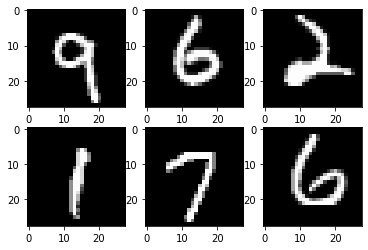

In [12]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
#plt.show()

In [20]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size,hidden_size,num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        #100, 1, 28, 28
        #100, 784
        images = images.reshape(-1,28*28)
        labels = labels
        
        #forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(i+1)%100==0:
            print(f'epoch{epoch+1}/{num_epochs},step {i+1}/{n_total_steps}, loss={loss.item():.4f}')
            
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28)
        labels = labels
        outputs = model(images)
        
        #value, index
        _,predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0*n_correct/n_samples
    print(f'accuracy = {acc}')

epoch1/2,step 100/600, loss=0.4959
epoch1/2,step 200/600, loss=0.3460
epoch1/2,step 300/600, loss=0.2616
epoch1/2,step 400/600, loss=0.3901
epoch1/2,step 500/600, loss=0.1871
epoch1/2,step 600/600, loss=0.1849
epoch2/2,step 100/600, loss=0.2641
epoch2/2,step 200/600, loss=0.1643
epoch2/2,step 300/600, loss=0.3081
epoch2/2,step 400/600, loss=0.3731
epoch2/2,step 500/600, loss=0.1079
epoch2/2,step 600/600, loss=0.2592
accuracy = 95.59
